In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df=pd.read_csv(r"C:\Users\RIBBONS\Downloads\Employee_2.csv")
# print(df)
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Salary
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,171369.0
1,Bachelors,2013,Pune,1,28,Female,No,3,1,136993.0
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,113807.0
3,Masters,2016,Bangalore,3,27,Male,No,5,1,166478.0
4,Masters,2017,NaN,3,24,Male,Yes,2,1,393136.0
...,...,...,...,...,...,...,...,...,...,...
1802,Bachelors,2014,Bangalore,3,25,Female,No,3,0,257493.0
1803,Bachelors,2016,Bangalore,3,26,Female,No,4,0,208095.0
1804,Bachelors,2016,Bangalore,3,26,Female,No,4,0,97346.0
1805,Bachelors,2014,New Delhi,3,26,Male,No,4,0,360181.0


In [4]:
# Step 1: Summary statistics (mean, median, min) for numeric columns (e.g., Age, Salary)
print("\n--- Summary Statistics ---")
numeric_cols = ['Age', 'Salary']  # Replace with actual numeric column names in your CSV
for col in numeric_cols:
    print(f"\nColumn: {col}")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Minimum: {df[col].min()}")



--- Summary Statistics ---

Column: Age
Mean: 26.310459324847812
Median: 26.0
Minimum: 22

Column: Salary
Mean: 224240.3236929922
Median: 226605.5
Minimum: 50135.0


In [5]:
# Step 2: Group by a categorical variable (e.g., Department or Age Group)
# Let's assume we have a column 'Age_Group' and we want to analyze Salary
if 'Age_Group' not in df.columns:
    # Create Age_Group column if not available
    bins = [18, 30, 40, 50, 60]
    labels = ['18-30', '31-40', '41-50', '51-60']
    df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Grouping by Age_Group and summarizing Salary
grouped = df.groupby('Age_Group')['Salary'].agg(['mean', 'median', 'min'])
print("\n--- Salary Statistics Grouped by Age Group ---")
print(grouped)

# Create a list of average salary for each age group
salary_by_group = grouped['mean'].tolist()
print("\nList of Average Salary by Age Group:", salary_by_group)


--- Salary Statistics Grouped by Age Group ---
                    mean    median      min
Age_Group                                  
18-30      224237.331995  226965.0  50135.0
31-40      232081.200000  226058.5  55866.0
41-50      127533.750000  124651.0  72962.0
51-60                NaN       NaN      NaN

List of Average Salary by Age Group: [224237.33199541285, 232081.2, 127533.75, nan]


In [7]:
# Step 3: Grouping on JOB_ID and its count
print("\n--- JOB_ID Count ---")
job_counts = df['PaymentTier'].value_counts()
print(job_counts)


--- JOB_ID Count ---
3    1352
2     359
1      96
Name: PaymentTier, dtype: int64


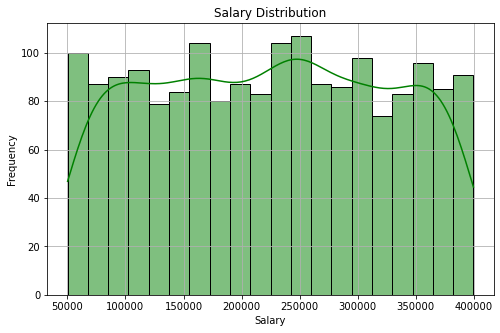

In [8]:
# Step 4: Data visualization for a column (e.g., Salary distribution)
plt.figure(figsize=(8,5))
sns.histplot(df['Salary'], kde=True, color='green', bins=20)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()